**MNIST 이미지에 컨브넷 훈련하기**

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype("float32")/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

**소규모 데이터셋(cat VS dog) 컨브넷 훈련하기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, shutil

In [ ]:
! pip install -q kaggle --upgrade
from google.colab import files

# Accept https://www.kaggle.com/c/dogs-vs-cats/rules
# Manually upload kaggle json file
! mkdir ~/.kaggle # 캐클 파일 만들기
#! cp /content/drive/My\ Drive/Colab\ Notebooks/kaggle.json ~/.kaggle/
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ # copy

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

! kaggle competitions download -c dogs-vs-cats
! unzip train.zip -d ./  # 기존의 경로가 아니라 내가 지정한 경로에 넣어주는 것 -d ./

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./train/dog.5499.jpg    
  inflating: ./train/dog.55.jpg      
  inflating: ./train/dog.550.jpg     
  inflating: ./train/dog.5500.jpg    
  inflating: ./train/dog.5501.jpg    
  inflating: ./train/dog.5502.jpg    
  inflating: ./train/dog.5503.jpg    
  inflating: ./train/dog.5504.jpg    
  inflating: ./train/dog.5505.jpg    
  inflating: ./train/dog.5506.jpg    
  inflating: ./train/dog.5507.jpg    
  inflating: ./train/dog.5508.jpg    
  inflating: ./train/dog.5509.jpg    
  inflating: ./train/dog.551.jpg     
  inflating: ./train/dog.5510.jpg    
  inflating: ./train/dog.5511.jpg    
  inflating: ./train/dog.5512.jpg    
  inflating: ./train/dog.5513.jpg    
  inflating: ./train/dog.5514.jpg    
  inflating: ./train/dog.5515.jpg    
  inflating: ./train/dog.5516.jpg    
  inflating: ./train/dog.5517.jpg    
  inflating: ./train/dog.5518.jpg    
  inflating: ./train/dog.5519.jpg    
  inflating: ./train/dog.552.jpg     
  inflating: .

In [ ]:
os.getcwd()

'/content'

In [ ]:
# 기존 경로
original_dataset_dir = "/content/train"

# 만들고 싶은 폴더
base_dir = "/content/sample_data/cats_and_dogs_small"
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [ ]:
# 각 폴더에 이미지 복사하기

#고양이
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ["cat.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
  scr = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

#강아지
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ["dog.{}.jpg".format(i) for i in range(1500,2000)]
for fname in fnames:
  scr = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
# 네트워크 구성하기

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



> 데이터 전처리(ImageDataGenerator이용)



In [ ]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150), #모든 이미지를 150*150 크기로 바꾸기
    batch_size = 20,
    class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100, #앞에서 batch_size를 20으로 했기 때문에 2,000(training 수)/20 = 100
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 16s 89ms/step - loss: 0.6913 - acc: 0.5326 - val_loss: 0.6805 - val_acc: 0.5080
Epoch 2/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6554 - acc: 0.6165 - val_loss: 0.6451 - val_acc: 0.6130
Epoch 3/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6109 - acc: 0.6526 - val_loss: 0.6023 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 9s 87ms/step - loss: 0.5826 - acc: 0.6986 - val_loss: 0.6001 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 9s 87ms/step - loss: 0.5484 - acc: 0.7231 - val_loss: 0.5805 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5194 - acc: 0.7448 - val_loss: 0.5826 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 9s 89ms/step - loss: 0.4819 - acc: 0.7769 - val_loss: 0.5851 - val_acc: 0.6860
Epoch 8/30
100/100 [==============================] - 9s 91ms/step -

In [ ]:
model.save("cats_and_dogs_small_1.h5")

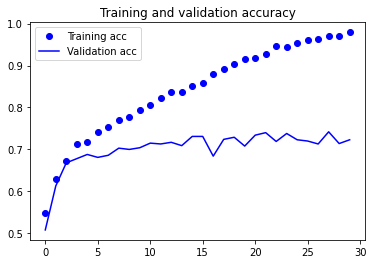

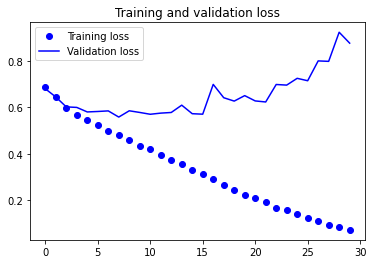

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



> 데이터 증식 사용하기



In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

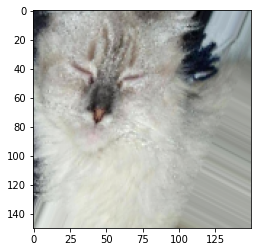

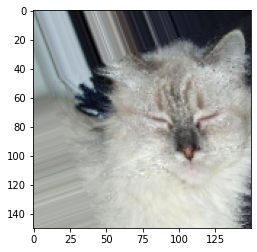

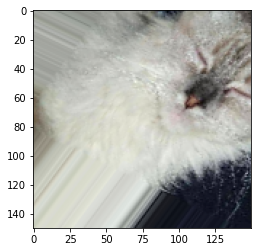

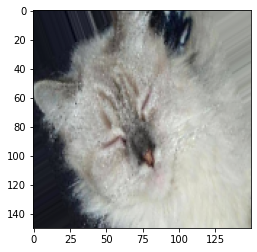

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150)) # 이미지 사이즈 다시 정의
x = image.img_to_array(img) # 이미지를 배열로 변환
x = x.reshape((1,) + x.shape) # (1,150,150,3)으로 변환

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()



> 드롭아웃 적용하여 과대적합 억제



In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #드롭아웃 적용
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # 주의 !!검증 데이터는 증식 되어서는 안됨!!

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150), #모든 이미지를 150*150 크기로 바꾸기
    batch_size = 20,
    class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100, 
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 18s 169ms/step - loss: 0.6973 - acc: 0.5082 - val_loss: 0.6892 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 17s 166ms/step - loss: 0.6874 - acc: 0.5444 - val_loss: 0.6787 - val_acc: 0.5610
Epoch 3/30
100/100 [==============================] - 17s 167ms/step - loss: 0.6838 - acc: 0.5586 - val_loss: 0.6592 - val_acc: 0.5950
Epoch 4/30
100/100 [==============================] - 17s 167ms/step - loss: 0.6621 - acc: 0.6019 - val_loss: 0.6410 - val_acc: 0.6130
Epoch 5/30
100/100 [==============================] - 17s 169ms/step - loss: 0.6472 - acc: 0.6338 - val_loss: 0.6243 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 17s 167ms/step - loss: 0.6399 - acc: 0.6317 - val_loss: 0.6066 - val_acc: 0.6470
Epoch 7/30
100/100 [==============================] - 17s 169ms/step - loss: 0.6285 - acc: 0.6387 - val_loss: 0.6441 - val_acc: 0.6350
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
model.save("cat_and_dog_samll_2.h5")

**사전 훈련된 컨브넷 사용하기**

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights = "imagenet",
                  include_top = False,
                  input_shape = (150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
# 1-1. 데이터 증식을 사용하지 않는 빠른 특성 추출

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/content/sample_data/cats_and_dogs_small"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4,4,512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = "binary")
  
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size : (i+1)*batch_size] = features_batch
    labels[i*batch_size : (i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
val_features, val_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000,4*4*512))
val_features = np.reshape(val_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = "relu", input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizers.RMSprop(lr=2e-5),
              loss = "binary_crossentropy",
              metrics = ["acc"])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(val_features, val_labels))

Epoch 1/30
100/100 [==============================] - 1s 8ms/step - loss: 0.6220 - acc: 0.6527 - val_loss: 0.4266 - val_acc: 0.8380
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4298 - acc: 0.8077 - val_loss: 0.3590 - val_acc: 0.8610
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3493 - acc: 0.8548 - val_loss: 0.3277 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3333 - acc: 0.8529 - val_loss: 0.3042 - val_acc: 0.8790
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2852 - acc: 0.8912 - val_loss: 0.2885 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2704 - acc: 0.8940 - val_loss: 0.2771 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2581 - acc: 0.8905 - val_loss: 0.2692 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0.

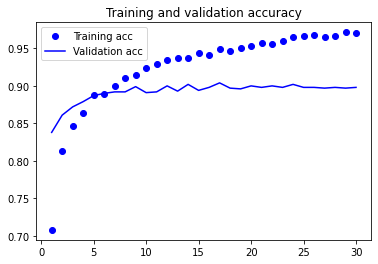

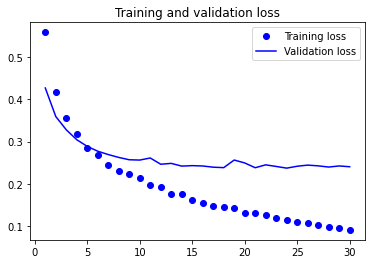

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 1-2. 데이터 증식을 사용한 특성 추출(엔드-투-엔드 방법)

from keras import models
from keras import layers
from keras import optimizers


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
# compile 전에 합성곱 기반 층 동결시키기!!

print("conv_base를 동결하기 전 훈련되는 가중치의 수:", len(model.trainable_weights))

conv_base.trainable = False
print("conv_base를 동결한 후 훈련되는 가중치의 수:", len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 10
conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # test데이터는 증식시키지 않기!!

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20,
      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 18s 169ms/step - loss: 0.5249 - acc: 0.7319 - val_loss: 0.2825 - val_acc: 0.8925
Epoch 2/30
100/100 [==============================] - 17s 165ms/step - loss: 0.3460 - acc: 0.8414 - val_loss: 0.2456 - val_acc: 0.8950
Epoch 3/30
100/100 [==============================] - 17s 165ms/step - loss: 0.3120 - acc: 0.8658 - val_loss: 0.2586 - val_acc: 0.8925
Epoch 4/30
100/100 [==============================] - 17s 166ms/step - loss: 0.3030 - acc: 0.8522 - val_loss: 0.2155 - val_acc: 0.9125
Epoch 5/30
100/100 [==============================] - 16s 164ms/step - loss: 0.2976 - acc: 0.8768 - val_loss: 0.2292 - val_acc: 0.9150
Epoch 6/30
100/100 [==============================] - 17s 166ms/step - loss: 0.2808 - acc: 0.8797 - val_loss: 0.1966 - val_acc: 0.9275
Epoch 7/30
100/100 [==============================] - 16s 164ms/step - loss: 0.2560 - acc: 0.8913 - val_lo

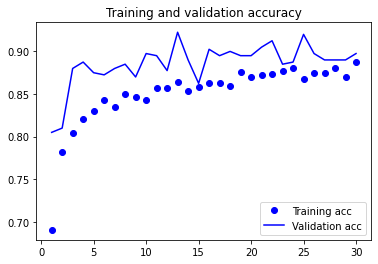

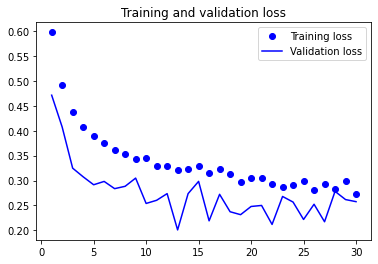

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 2. 미세조정(conv_base의 최상위 2-3개 층만 조정)

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5), # 학습률을 낮춘 것 -> 학습된 표현을 조금씩 수정하기 위해서
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20,
      verbose=1)

Epoch 1/30
100/100 [==============================] - 18s 173ms/step - loss: 0.2568 - acc: 0.9006 - val_loss: 0.2132 - val_acc: 0.9050
Epoch 2/30
100/100 [==============================] - 17s 170ms/step - loss: 0.2070 - acc: 0.9217 - val_loss: 0.1994 - val_acc: 0.9025
Epoch 3/30
100/100 [==============================] - 17s 170ms/step - loss: 0.2075 - acc: 0.9155 - val_loss: 0.2064 - val_acc: 0.9200
Epoch 4/30
100/100 [==============================] - 17s 174ms/step - loss: 0.2184 - acc: 0.9062 - val_loss: 0.1650 - val_acc: 0.9300
Epoch 5/30
100/100 [==============================] - 17s 171ms/step - loss: 0.1857 - acc: 0.9212 - val_loss: 0.2292 - val_acc: 0.9100
Epoch 6/30
100/100 [==============================] - 17s 171ms/step - loss: 0.1721 - acc: 0.9311 - val_loss: 0.1946 - val_acc: 0.9125
Epoch 7/30
100/100 [==============================] - 17s 170ms/step - loss: 0.1845 - acc: 0.9268 - val_loss: 0.1881 - val_acc: 0.9275
Epoch 8/30
100/100 [==============================] - 1

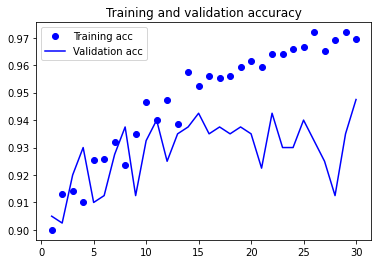

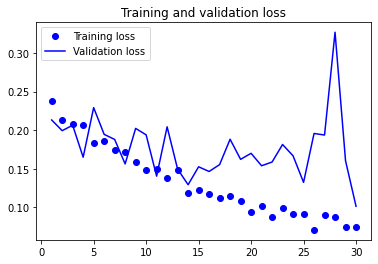

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

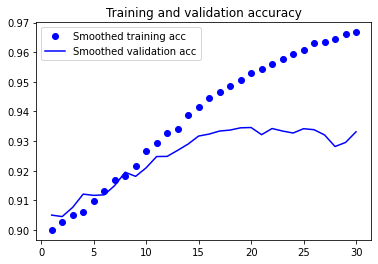

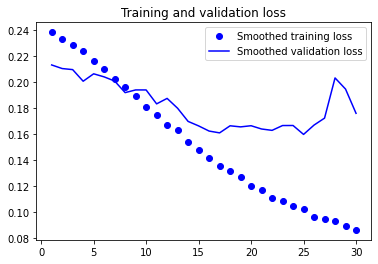

In [ ]:
# 부드러운 곡선 그래프 만들기: 지수 이동 평균 이용

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 모델 평가해보기

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 4s 69ms/step - loss: 2.2597e-04 - acc: 1.0000
test acc: 1.0
